In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
file = '/media/ck/Elements/Africa/WestAfrica/NFLICS/cell_stats14.2_n18_15.2_n16_Unique_msg9_cell_mean_cellthresh_n70_cellpixlt_n70_freq_mean_00000_refhours_18_21.csv' 

In [4]:
tab = pd.read_table(file, parse_dates=True, delimiter=',')

In [5]:
test= tab[tab.time==tab.time[0]]
test.com_lon.values

array([26.])

In [6]:
tab

,time,com_lon,com_lat,cell_min_T,cell_mean_T,cell_area_km2
0,2004-08-07 20:00:00,26.0,235.0,-83.0,-74.0,8067.97
1,2005-08-19 18:00:00,19.0,232.0,-79.0,-74.0,18732.42
2,2005-08-29 20:00:00,11.0,240.0,-84.0,-74.0,16755.44
3,2006-07-24 19:00:00,28.0,224.0,-86.0,-76.0,6564.46
4,2006-07-26 18:00:00,13.0,253.0,-84.0,-75.0,12379.89
5,2006-08-12 18:00:00,21.0,252.0,-80.0,-74.0,10431.65
6,2006-09-07 18:00:00,28.0,224.0,-78.0,-74.0,8965.96
7,2007-07-17 18:00:00,24.0,244.0,-87.0,-76.0,9453.58
8,2007-07-25 18:00:00,30.0,234.0,-83.0,-74.0,13388.85
9,2007-08-02 21:00:00,28.0,237.0,-80.0,-74.0,13366.93


In [7]:
tab = tab[pd.to_datetime(tab.time).dt.hour > 19]

In [155]:
pdic = pd.read_csv('/media/ck/Elements/Africa/WestAfrica/NFLICS/tables/coresPower_MSG_-40_700km2_-50points_dominant_vcores_14-4W_15UTC.csv', na_values=[-999])
pdic = pd.DataFrame.from_dict(pdic)
tab = pdic
tab['time'] = tab['date']

In [156]:
tab

,id,date,lon,lat,hour,month,year,day,time
0,0,2004-03-31 15:00:00,-5.332872,11.390175,15,3,2004,31,2004-03-31 15:00:00
1,1,2004-03-31 15:00:00,-4.569304,11.611669,15,3,2004,31,2004-03-31 15:00:00
2,2,2004-04-12 15:00:00,-5.737114,10.680237,15,4,2004,12,2004-04-12 15:00:00
3,3,2004-04-12 15:00:00,-4.883715,12.230894,15,4,2004,12,2004-04-12 15:00:00
4,4,2004-04-16 15:00:00,-9.015965,10.546932,15,4,2004,16,2004-04-16 15:00:00
...,...,...,...,...,...,...,...,...,...
5831,5831,2018-08-29 15:00:00,-10.273607,15.999989,15,8,2018,29,2018-08-29 15:00:00
5832,5832,2018-08-30 15:00:00,-4.120147,14.210988,15,8,2018,30,2018-08-30 15:00:00
5833,5833,2018-08-31 15:00:00,-4.075231,14.210988,15,8,2018,31,2018-08-31 15:00:00
5834,5834,2018-08-31 15:00:00,-4.389641,14.998279,15,8,2018,31,2018-08-31 15:00:00


In [157]:
print(tab.lon.max(), tab.lon.min(), tab.lat.max(), tab.lat.min())

-4.030315322984835 -13.956699212505546 16.99664099988836 10.502484461110708


In [158]:
box = [-8.5,-8,12,12.5]
np.sum((tab.lon>box[0]) & (tab.lon<box[1]) & (tab.lat>box[2]) & (tab.lat<box[3]))

27

In [159]:
tab = tab.loc[(tab.lon>box[0]) & (tab.lon<box[1]) & (tab.lat>box[2]) & (tab.lat<box[3])]

In [160]:
len(np.unique(tab.time))

27

In [52]:
#tab = tab[pd.to_datetime(tab.time).dt.hour > 18]

In [53]:
pd.to_datetime(tab.time.values[0]).month

4

In [54]:
def cut_kernel(xpos, ypos, arr, date, lon, lat):

    #AMSRE 0.25 degrees ~ 27.5 km
    dist = 10

    kernel = u_arrays.cut_kernel(arr,xpos, ypos,dist)


    # if (np.sum(np.isfinite(kernel)) < 0.10 * kernel.size):
    #     return

    kernel3 = kernel - np.nanmean(kernel)

    cnt = np.zeros_like(kernel)
    cnt[np.isfinite(kernel)] = 1

    if kernel.shape != (dist*2+1, dist*2+1):
        return None

    return kernel, kernel3, cnt

In [89]:
def run(shift):
    dic = {
    'q' : [],
    'qup' : [],
    't' : [],
    'u' : [],
    'v' : [],
    'w' : [],
    'u_orig' : [],
    'v_orig' : [],        
    'd' : [],
    't2' : [],
    'u100' : [],
    'v100' : [],
    'u100_orig' : [],
    'v100_orig' : [],
    'slp' : [],
    'cnt' : [],
    'cape' : [],
    'divMoist' : [],
    'ice' : [],
    'ice_orig' : [],
   # 'sh' : [],
    'rh' : [],
    'zshear' : [],
    'theta' : []
    }
    
    clim = '/home/ck/DIR/mymachine/ERA5/monthly/synop_selfmade/CLIM_2000-2014/'


    for date in np.unique(tab.time):


        single = tab[tab.time==date]

        dt = pd.to_datetime(date)
        daystring = str(abs(shift))
        dayd = pd.Timedelta(daystring + 'days')
        if shift < 0:
            dt = dt - dayd
        if shift >=0:
            dt = dt + dayd
            
        window1 = dt - pd.Timedelta('7days')
        window2 = dt + pd.Timedelta('7days')
        

        fdate = '_' + str(dt.year) +'_' + str(dt.month).zfill(2) + '_'# + str(dt.day).zfill(2)
        
        hour = 12
        shour = 12

        try:
            era5_files = '/home/ck/DIR/mymachine/ERA5/hourly/' #cnst.ERA5 + 'hourly/
            lsta = xr.open_dataset(era5_files + 'pressure_levels/ERA5' + fdate + 'pl.nc') #sma  #'AMSR_L3_LPRMv05_A_'
            lsta_clim = xr.open_dataset(clim + \
                            'pressure_levels/ERA5_2000-2014_CLIM_' + str(dt.month).zfill(2) + '-'+str(hour).zfill(2)+'_pl.nc')
            
            srfc = xr.open_dataset(era5_files + 'surface/ERA5' + fdate + 'srfc.nc') #sma  #'AMSR_L3_LPRMv05_A_'
            srfc_clim = xr.open_dataset(clim + \
                            'surface/ERA5_2000-2014_CLIM_' + str(dt.month).zfill(2) + '-'+str(hour).zfill(2)+'_srfc.nc')

        except:
            print('File missing', cnst.ERA5  + 'hourly/pressure_levels/ERA5' + fdate + 'pl.nc')
            continue
            
        lsta = u_darrays.flip_lat(lsta)
        srfc = u_darrays.flip_lat(srfc)
        

        lsta = lsta.sel(longitude=slice(-18, 0), latitude=slice(10,17))
        lsta_clim = lsta_clim.sel(lon=slice(-18, 0), lat=slice(10, 17))
        
        srfc = srfc.sel(longitude=slice(-18, 0), latitude=slice(10,17))
        srfc_clim = srfc_clim.sel(lon=slice(-18, 0), lat=slice(10, 17))
        
        pos = np.where(lsta['time.hour']==shour)
        if np.sum(pos) == 0:
            continue
        
        try:
            lsta_low = lsta.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(hour).zfill(2)+':00:00', level=850)
        except:
            continue
        lsta_up = lsta.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(hour).zfill(2)+':00:00', level=500)
        
        srfc_low = srfc.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(hour).zfill(2)+':00:00')
        
        lsta10 = lsta.isel(time=pos[0])
        lsta10_low = lsta10.sel(time=slice(str(window1.year)+'-'+str(window1.month)+'-'+str(window1.day)+'T'+str(shour).zfill(2)+':00:00' , \
                                      str(window2.year)+'-'+str(window2.month)+'-'+str(window2.day)+'T'+str(shour).zfill(2)+':00:00'), level=850)
        
        lsta10_up = lsta10.sel(time=slice(str(window1.year)+'-'+str(window1.month)+'-'+str(window1.day)+'T'+str(shour).zfill(2)+':00:00' , \
                                      str(window2.year)+'-'+str(window2.month)+'-'+str(window2.day)+'T'+str(shour).zfill(2)+':00:00'), level=500)
        
        
        
#         lsta10_low = lsta10.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(shour).zfill(2)+':00:00', level=925)
        
#         lsta10_up = lsta10.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(shour).zfill(2)+':00:00', level=650)
        
        
        
        
        pos = np.where(srfc['time.hour']==shour)
        #ipdb.set_trace()
        srfc10 = srfc.isel(time=pos[0])
        srfc10 = srfc10.sel(time=slice(str(window1.year)+'-'+str(window1.month)+'-'+str(window1.day)+'T'+str(shour).zfill(2)+':00:00' , \
                                      str(window2.year)+'-'+str(window2.month)+'-'+str(window2.day)+'T'+str(shour).zfill(2)+':00:00'))
     
        
#         srfc10 = srfc.isel(time=pos[0])
#         srfc10 = srfc10.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(shour).zfill(2)+':00:00' )
     
        
        
        
        lsta_clim_low = lsta_clim.sel(level=925)
        lsta_clim_up = lsta_clim.sel(level=650)

        q = lsta_low['q'].squeeze()
        qup = lsta_up['q'].squeeze()
        u = lsta_up['u'].squeeze()
        v = lsta_up['v'].squeeze()
        w = lsta_low['w'].squeeze()
        t = lsta_low['t'].squeeze()
        d = lsta_low['d'].squeeze()
        rh = lsta_low['r'].squeeze()
        t2 = srfc_low['t2m'].squeeze()
        u100 = srfc_low['u100'].squeeze()
        v100 = srfc_low['v100'].squeeze()
        slp = srfc_low['sp'].squeeze()
        cape = srfc_low['cape'].squeeze()
        divMoist = srfc_low['p84.162'].squeeze()
        ice = srfc_low['tciw'].squeeze()
       # sh = srfc_low['msshf'].squeeze()
        
        q_clim = lsta10_low['q'].squeeze().mean('time')
        qup_clim = lsta10_up['q'].squeeze().mean('time')
        u_clim = lsta10_up['u'].squeeze().mean('time')
        v_clim = lsta10_up['v'].squeeze().mean('time')
        w_clim = lsta10_low['w'].squeeze().mean('time')
        t_clim = lsta10_low['t'].squeeze().mean('time')
        rh_clim = lsta10_low['r'].squeeze().mean('time')
        d_clim = lsta10_low['d'].squeeze().mean('time')
        t2_clim = srfc10['t2m'].squeeze().mean('time')
        u100_clim = srfc10['u100'].squeeze().mean('time')
        v100_clim = srfc10['v100'].squeeze().mean('time')
        slp_clim = srfc10['sp'].squeeze().mean('time')
        cape_clim = srfc10['cape'].squeeze().mean('time')
        divMoist_clim = srfc10['p84.162'].squeeze().mean('time')
        ice_clim = srfc10['tciw'].squeeze().mean('time')
       # sh_clim = srfc10['msshf'].squeeze().mean('time')
        
#         q_clim = lsta10_low['q'].squeeze()
#         u_clim = lsta10_up['u'].squeeze()
#         v_clim = lsta10_up['v'].squeeze()
#         w_clim = lsta10_low['w'].squeeze()
#         t_clim = lsta10_low['t'].squeeze()
#         rh_clim = lsta10_low['r'].squeeze()
#         d_clim = lsta10_low['d'].squeeze()
#         t2_clim = srfc10['t2m'].squeeze()
#         u100_clim = srfc10['u100'].squeeze()
#         v100_clim = srfc10['v100'].squeeze()
#         slp_clim = srfc10['sp'].squeeze()
#         cape_clim = srfc10['cape'].squeeze()
#         hcc_clim = srfc10['hcc'].squeeze()
#         mcc_clim = srfc10['mcc'].squeeze()
#         divMoist_clim = srfc10['p84.162']
#         ice_clim = srfc10['tciw'].squeeze()
#         sh_clim = srfc10['ishf'].squeeze()

#         q_clim = lsta_clim_low['q'].squeeze()
#         u_clim = lsta_clim_up['u'].squeeze()
#         v_clim = lsta_clim_up['v'].squeeze()
#         t_clim = lsta_clim_low['t'].squeeze()
#         d_clim = lsta_clim_low['d'].squeeze()
#         t2_clim = srfc_clim['t2m'].squeeze()
#         u100_clim = srfc_clim['u100'].squeeze()
#         v100_clim = srfc_clim['v100'].squeeze()
#         slp_clim = srfc_clim['msl'].squeeze()

        print('Doing '+ 'AMSR_' + str(dt.year) + str(dt.month).zfill(2) + str(
        dt.day).zfill(2) + '.nc')
    
        theta_low = u_met.theta_e(925,lsta_low['t'].squeeze().values-273.15,lsta_low['q'].squeeze().values)
        theta_high = u_met.theta_e(700,lsta_up['t'].squeeze().values-273.15,lsta_up['q'].squeeze().values)
        thetadiff = (theta_low-theta_high).squeeze()
        
        theta10_low = u_met.theta_e(925,lsta10_low['t'].squeeze().mean('time').values-273.15,lsta10_low['q'].squeeze().mean('time').values)
        theta10_high = u_met.theta_e(700,lsta10_up['t'].squeeze().mean('time').values-273.15,lsta10_up['q'].squeeze().mean('time').values)
        thetadiff10 = (theta10_low-theta10_high).squeeze()
        
        cnt = np.zeros_like(q.values)
        cnt[np.isfinite(q.values)] = 1

        dic['q'].append(q.values- q_clim.values)
        dic['qup'].append(qup.values- qup_clim.values)
        dic['v'].append(v.values- v_clim.values)
        dic['w'].append(w.values- w_clim.values)
        dic['u'].append(u.values- u_clim.values)
        dic['rh'].append(rh.values- rh_clim.values)
        dic['v_orig'].append(v.values)#
        dic['u_orig'].append(u.values)#
        dic['t'].append(t.values-t_clim.values)
        dic['d'].append(d.values-d_clim.values)
        dic['t2'].append(t2.values-t2_clim.values)
        dic['u100'].append(u100.values-u100_clim.values)
        dic['v100'].append(v100.values-v100_clim.values)
        dic['u100_orig'].append(u100.values)#
        dic['v100_orig'].append(v100.values)#
        dic['slp'].append(slp.values-slp_clim.values)
        dic['cape'].append(cape.values-cape_clim.values)#s-v100_clim.values)
        dic['divMoist'].append(divMoist.values-divMoist_clim.values)#-slp_clim.values)
        dic['ice'].append(ice.values-ice_clim.values)
        dic['ice_orig'].append(ice.values)
       # dic['sh'].append(sh.values-sh_clim.values)
#         ws, wd = u_met.u_v_to_ws_wd(u.values-u100.values, v.values-v100.values)
#         wsclim, wd = u_met.u_v_to_ws_wd(u_clim.values-u100_clim.values, v_clim.values-v100_clim.values)
        dic['zshear'].append((u.values-u100.values)-(u_clim.values-u100_clim.values)) #-wsclim
        dic['theta'].append(thetadiff-thetadiff10)
        dic['cnt'].append(cnt)

        lat = lsta_low.latitude.values
        lon = lsta_low.longitude.values
        
        
    #ipdb.set_trace()
    for k in dic.keys():
        #print(k)
        dic[k] = np.nansum(np.stack(dic[k], axis=0), axis=0)

    return dic, lat, lon

In [56]:
def calc(dic):
    
    dics = {}
    for k in dic.keys():
        if k == 'cnt':
            continue
        dics[k] = dic[k] / dic['cnt']
    return dics

In [57]:
dic, lat, lon = run(1)

Doing AMSR_20040413.nc
Doing AMSR_20040516.nc
Doing AMSR_20040524.nc
Doing AMSR_20040703.nc
Doing AMSR_20040706.nc
Doing AMSR_20040707.nc
Doing AMSR_20040718.nc
Doing AMSR_20040724.nc
Doing AMSR_20040803.nc
Doing AMSR_20040817.nc
Doing AMSR_20040820.nc
Doing AMSR_20040821.nc
Doing AMSR_20040824.nc
Doing AMSR_20040827.nc
Doing AMSR_20040903.nc
Doing AMSR_20040909.nc
Doing AMSR_20040912.nc
Doing AMSR_20040927.nc
Doing AMSR_20041012.nc
Doing AMSR_20041016.nc
Doing AMSR_20050413.nc
Doing AMSR_20050517.nc
Doing AMSR_20050531.nc
Doing AMSR_20050605.nc
Doing AMSR_20050620.nc
Doing AMSR_20050704.nc
Doing AMSR_20050709.nc
Doing AMSR_20050715.nc
Doing AMSR_20050720.nc
Doing AMSR_20050726.nc
Doing AMSR_20050730.nc
Doing AMSR_20050804.nc
Doing AMSR_20050813.nc
Doing AMSR_20050819.nc
Doing AMSR_20050829.nc
Doing AMSR_20050903.nc
Doing AMSR_20050907.nc
Doing AMSR_20050924.nc
Doing AMSR_20050926.nc
Doing AMSR_20051005.nc
Doing AMSR_20060407.nc
Doing AMSR_20060424.nc
Doing AMSR_20060426.nc
Doing AMSR_

KeyboardInterrupt: 

In [ ]:
dic['t2']/dic['cnt']

In [ ]:
dic = calc(dic)

In [142]:
import matplotlib.patches as patches
def draw_map(ax, t, lat, lon, title='', levels=None, quiver=None, contour=None):
   
    plt.contourf(lon, lat, t, transform=ccrs.PlateCarree(), cmap='RdBu', levels=levels, extend='both')
    ax.coastlines()

#     ## quiver list
#     if quiver is not None:
#         qu = ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'],scale=quiver['scale'], width=0.003, headwidth=3.2)
    
    
        ## additional contour on plot   
    if contour is not None:
        contours = ax.contour(contour['x'], contour['y'], contour['data'], levels=contour['levels'], colors='k', linewidths=2 )
        plt.clabel(contours, inline=True, fontsize=7, fmt='%1.1f')
    
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    xl.xlines = False
    xl.ylines=False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--', color='grey');
    
    rect2 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=0.8,edgecolor='w',facecolor='none', zorder=99)
        
    ax.add_patch(rect2)
    
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label('K')

In [ ]:
np.arange(-1,1,5)

In [ ]:
st=2
sarrow = 1
scale = 35
f = plt.figure(figsize=(13,8), dpi=300)

ax = f.add_subplot(111, projection=ccrs.PlateCarree())
lon2d, lat2d = np.meshgrid(lon,lat)
xquiv = lon2d[sarrow::st, sarrow::st]
yquiv = lat2d[sarrow::st, sarrow::st]


ws, wd = u_met.u_v_to_ws_wd(dic['u']-dic['u100'], dic['v']-dic['v100']) 

var = dic['t']
u = dic['u100']
v = dic['v100']
cvar = 'slp'
edge = np.max([np.abs(np.percentile(dic[cvar],10)),np.abs(np.percentile(dic[cvar],90))])
levs = np.linspace(edge*-1,edge,6)
contour = {'data' : dic[cvar], 'x': lon, 'y' : lat, 'levels' : levs}

edge = np.max([np.abs(np.percentile(var,10)),np.abs(np.percentile(var,90))])
lev = np.linspace(edge*-1,edge,6)

uu = u[sarrow::st, sarrow::st]
vv = v[sarrow::st, sarrow::st]
qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}
draw_map(ax, var, lat, lon, title='Day -3',  quiver=qin, levels=lev, contour=contour)
f.canvas.draw()
plt.tight_layout()
#plt.savefig(cnst.network_data + 'figs/NFLICS/plots/small_presi/NFLICS_single_t_slp_uv_1200.jpg')

In [ ]:
st=2
sarrow = 2
scale = 30
utag = 'u100'
vtag = 'v100'
f = plt.figure(figsize=(15,6), dpi=300)

for ids, num in enumerate([-2,-1,0,1,2,3]):

    ax = f.add_subplot(2,3,ids+1, projection=ccrs.PlateCarree())
    print(num)
    dic, lat, lon = run(num)
    dic = calc(dic)
    
    if ids == 0:
        lon2d, lat2d = np.meshgrid(lon,lat)
        xquiv = lon2d[sarrow::st, sarrow::st]
        yquiv = lat2d[sarrow::st, sarrow::st]
    #ipdb.set_trace()
    
    ws, wd = u_met.u_v_to_ws_wd(dic['u_orig']-dic['u100_orig'], dic['v_orig']-dic['v100_orig'])
    var = dic['ice']
    
    if ids == 0:
        edge = np.max([np.abs(np.percentile(var,1)),np.abs(np.percentile(var,99))])
        lev = np.linspace(edge*-1,edge,6) # edge*-1
    #ipdb.set_trace()
    u = dic[utag]
    v = dic[vtag]

    uu = u[sarrow::st, sarrow::st]
    vv = v[sarrow::st, sarrow::st]
    qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}
    
    
    cvar = 'q'
    invar = dic[cvar]*1000
    if ids == 0:
        edge = np.max([np.abs(np.percentile(invar,5)),np.abs(np.percentile(invar,95))])
        levs = np.linspace(edge*-1,edge,6) # edge*-1
    contour = {'data' : invar, 'x' : lon, 'y' : lat, 'levels' : levs}
    
    draw_map(ax, var, lat, lon, title='Day '+str(num),  quiver=qin, levels=lev, contour=contour)  #levels=lev,

f.canvas.draw()
plt.tight_layout()
#plt.savefig(cnst.network_data + 'figs/NFLICS/plots/cb_same/NFLICS_ERA5anomaly_dakarstorms_large_ice_t2_uv10_anom_1200.jpg')

In [ ]:
st=2
sarrow = 2
scale = 40
utag = 'u100_orig'
vtag = 'v100_orig'
f = plt.figure(figsize=(15,5), dpi=300)

for ids, num in enumerate([-1,0]):

    ax = f.add_subplot(1,2,ids+1, projection=ccrs.PlateCarree())
    print(num)
    dic, lat, lon = run(num)
    dic = calc(dic)
    
    if ids == 0:
        lon2d, lat2d = np.meshgrid(lon,lat)
        xquiv = lon2d[sarrow::st, sarrow::st]
        yquiv = lat2d[sarrow::st, sarrow::st]
    #ipdb.set_trace()
    
    ws, wd = u_met.u_v_to_ws_wd(dic['u_orig']-dic['u100_orig'], dic['v_orig']-dic['v100_orig'])
    var = dic['slp']
    
    if ids == 0:
        edge = np.max([np.abs(np.percentile(var,5)),np.abs(np.percentile(var,95))])
        lev = np.linspace(edge*-1,edge,6) # edge*-1
    #ipdb.set_trace()
    u = dic[utag]
    v = dic[vtag]

    uu = u[sarrow::st, sarrow::st]
    vv = v[sarrow::st, sarrow::st]
    qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}
    
    
    cvar = 'v'
    invar = dic[cvar]
    if ids == 0:
        edge = np.max([np.abs(np.percentile(invar,20)),np.abs(np.percentile(invar,80))])
        levs = np.linspace(edge*-1,edge,6) # edge*-1
    contour = {'data' : invar, 'x' : lon, 'y' : lat, 'levels' : levs}
    
    draw_map(ax, var, lat, lon, title='Day '+str(num),  quiver=qin, levels=lev, contour=contour)  #levels=lev,

f.canvas.draw()
plt.tight_layout()
#plt.savefig(cnst.network_data + 'figs/NFLICS/plots/small_presi/nine/NFLICS_ERA5anomaly_dakarstorms_large_slp_v_uv_orig_1200.jpg')

In [164]:
import matplotlib.patches as patches
def draw_map(ax, t, lat, lon, title='', levels=None, quiver=None, contour=None):
   
    plt.contourf(lon, lat, t, transform=ccrs.PlateCarree(), cmap='RdBu', levels=levels, extend='both')
    ax.coastlines()

#     ## quiver list
#     if quiver is not None:
#         qu = ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'],scale=quiver['scale'], width=0.003, headwidth=3.2)
    
    
        ## additional contour on plot   
    contour=None
    if contour is not None:
        contours = ax.contour(contour['x'], contour['y'], contour['data'], levels=contour['levels'], colors='k', linewidths=2 )
        plt.clabel(contours, inline=True, fontsize=7, fmt='%1.1f')
    
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    xl.xlines = False
    xl.ylines=False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--', color='grey');
    
    rect2 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=1,edgecolor='green',facecolor='none', zorder=99)
        
    ax.add_patch(rect2)
    
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label('g/kg')

In [165]:
box

[-8.5, -8, 12, 12.5]

## 

-1
Doing AMSR_20040908.nc
Doing AMSR_20050618.nc
Doing AMSR_20050626.nc
Doing AMSR_20050704.nc
Doing AMSR_20050708.nc
Doing AMSR_20050924.nc
Doing AMSR_20060804.nc
Doing AMSR_20070901.nc
Doing AMSR_20080702.nc
Doing AMSR_20080811.nc
Doing AMSR_20080826.nc
Doing AMSR_20080901.nc
Doing AMSR_20090605.nc
Doing AMSR_20090607.nc
Doing AMSR_20090713.nc
Doing AMSR_20090806.nc
Doing AMSR_20090916.nc
Doing AMSR_20100523.nc
Doing AMSR_20100916.nc
Doing AMSR_20100922.nc
Doing AMSR_20110622.nc
Doing AMSR_20110806.nc
Doing AMSR_20120825.nc
Doing AMSR_20130723.nc
Doing AMSR_20140516.nc
Doing AMSR_20140815.nc
File missing /home/ck/DIR/mymachine/ERA5/hourly/pressure_levels/ERA5_2018_08_pl.nc
0


/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Doing AMSR_20040909.nc
Doing AMSR_20050619.nc
Doing AMSR_20050627.nc
Doing AMSR_20050705.nc
Doing AMSR_20050709.nc
Doing AMSR_20050925.nc
Doing AMSR_20060805.nc
Doing AMSR_20070902.nc
Doing AMSR_20080703.nc
Doing AMSR_20080812.nc
Doing AMSR_20080827.nc
Doing AMSR_20080902.nc
Doing AMSR_20090606.nc
Doing AMSR_20090608.nc
Doing AMSR_20090714.nc
Doing AMSR_20090807.nc
Doing AMSR_20090917.nc
Doing AMSR_20100524.nc
Doing AMSR_20100917.nc
Doing AMSR_20100923.nc
Doing AMSR_20110623.nc
Doing AMSR_20110807.nc
Doing AMSR_20120826.nc
Doing AMSR_20130724.nc
Doing AMSR_20140517.nc
Doing AMSR_20140816.nc
File missing /home/ck/DIR/mymachine/ERA5/hourly/pressure_levels/ERA5_2018_08_pl.nc
1


/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Doing AMSR_20040910.nc
Doing AMSR_20050620.nc
Doing AMSR_20050628.nc
Doing AMSR_20050706.nc
Doing AMSR_20050710.nc
Doing AMSR_20050926.nc
Doing AMSR_20060806.nc
Doing AMSR_20070903.nc
Doing AMSR_20080704.nc
Doing AMSR_20080813.nc
Doing AMSR_20080828.nc
Doing AMSR_20080903.nc
Doing AMSR_20090607.nc
Doing AMSR_20090609.nc
Doing AMSR_20090715.nc
Doing AMSR_20090808.nc
Doing AMSR_20090918.nc
Doing AMSR_20100525.nc
Doing AMSR_20100918.nc
Doing AMSR_20100924.nc
Doing AMSR_20110624.nc
Doing AMSR_20110808.nc
Doing AMSR_20120827.nc
Doing AMSR_20130725.nc
Doing AMSR_20140518.nc
Doing AMSR_20140817.nc
File missing /home/ck/DIR/mymachine/ERA5/hourly/pressure_levels/ERA5_2018_08_pl.nc
2


/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Doing AMSR_20040911.nc
Doing AMSR_20050621.nc
Doing AMSR_20050629.nc
Doing AMSR_20050707.nc
Doing AMSR_20050711.nc
Doing AMSR_20050927.nc
Doing AMSR_20060807.nc
Doing AMSR_20070904.nc
Doing AMSR_20080705.nc
Doing AMSR_20080814.nc
Doing AMSR_20080829.nc
Doing AMSR_20080904.nc
Doing AMSR_20090608.nc
Doing AMSR_20090610.nc
Doing AMSR_20090716.nc
Doing AMSR_20090809.nc
Doing AMSR_20090919.nc
Doing AMSR_20100526.nc
Doing AMSR_20100919.nc
Doing AMSR_20100925.nc
Doing AMSR_20110625.nc
Doing AMSR_20110809.nc
Doing AMSR_20120828.nc
Doing AMSR_20130726.nc
Doing AMSR_20140519.nc
Doing AMSR_20140818.nc
File missing /home/ck/DIR/mymachine/ERA5/hourly/pressure_levels/ERA5_2018_08_pl.nc
-1


/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Doing AMSR_20040908.nc
Doing AMSR_20050618.nc
Doing AMSR_20050626.nc
Doing AMSR_20050704.nc
Doing AMSR_20050708.nc
Doing AMSR_20050924.nc
Doing AMSR_20060804.nc
Doing AMSR_20070901.nc
Doing AMSR_20080702.nc
Doing AMSR_20080811.nc
Doing AMSR_20080826.nc
Doing AMSR_20080901.nc
Doing AMSR_20090605.nc
Doing AMSR_20090607.nc
Doing AMSR_20090713.nc
Doing AMSR_20090806.nc
Doing AMSR_20090916.nc
Doing AMSR_20100523.nc
Doing AMSR_20100916.nc
Doing AMSR_20100922.nc
Doing AMSR_20110622.nc
Doing AMSR_20110806.nc
Doing AMSR_20120825.nc
Doing AMSR_20130723.nc
Doing AMSR_20140516.nc
Doing AMSR_20140815.nc
File missing /home/ck/DIR/mymachine/ERA5/hourly/pressure_levels/ERA5_2018_08_pl.nc
0


/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Doing AMSR_20040909.nc
Doing AMSR_20050619.nc
Doing AMSR_20050627.nc
Doing AMSR_20050705.nc
Doing AMSR_20050709.nc
Doing AMSR_20050925.nc
Doing AMSR_20060805.nc
Doing AMSR_20070902.nc
Doing AMSR_20080703.nc
Doing AMSR_20080812.nc
Doing AMSR_20080827.nc
Doing AMSR_20080902.nc
Doing AMSR_20090606.nc
Doing AMSR_20090608.nc
Doing AMSR_20090714.nc
Doing AMSR_20090807.nc
Doing AMSR_20090917.nc
Doing AMSR_20100524.nc
Doing AMSR_20100917.nc
Doing AMSR_20100923.nc
Doing AMSR_20110623.nc
Doing AMSR_20110807.nc
Doing AMSR_20120826.nc
Doing AMSR_20130724.nc
Doing AMSR_20140517.nc
Doing AMSR_20140816.nc
File missing /home/ck/DIR/mymachine/ERA5/hourly/pressure_levels/ERA5_2018_08_pl.nc
1


/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Doing AMSR_20040910.nc
Doing AMSR_20050620.nc
Doing AMSR_20050628.nc
Doing AMSR_20050706.nc
Doing AMSR_20050710.nc
Doing AMSR_20050926.nc
Doing AMSR_20060806.nc
Doing AMSR_20070903.nc
Doing AMSR_20080704.nc
Doing AMSR_20080813.nc
Doing AMSR_20080828.nc
Doing AMSR_20080903.nc
Doing AMSR_20090607.nc
Doing AMSR_20090609.nc
Doing AMSR_20090715.nc
Doing AMSR_20090808.nc
Doing AMSR_20090918.nc
Doing AMSR_20100525.nc
Doing AMSR_20100918.nc
Doing AMSR_20100924.nc
Doing AMSR_20110624.nc
Doing AMSR_20110808.nc
Doing AMSR_20120827.nc
Doing AMSR_20130725.nc
Doing AMSR_20140518.nc
Doing AMSR_20140817.nc
File missing /home/ck/DIR/mymachine/ERA5/hourly/pressure_levels/ERA5_2018_08_pl.nc
2


/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Doing AMSR_20040911.nc
Doing AMSR_20050621.nc
Doing AMSR_20050629.nc
Doing AMSR_20050707.nc
Doing AMSR_20050711.nc
Doing AMSR_20050927.nc
Doing AMSR_20060807.nc
Doing AMSR_20070904.nc
Doing AMSR_20080705.nc
Doing AMSR_20080814.nc
Doing AMSR_20080829.nc
Doing AMSR_20080904.nc
Doing AMSR_20090608.nc
Doing AMSR_20090610.nc
Doing AMSR_20090716.nc
Doing AMSR_20090809.nc
Doing AMSR_20090919.nc
Doing AMSR_20100526.nc
Doing AMSR_20100919.nc
Doing AMSR_20100925.nc
Doing AMSR_20110625.nc
Doing AMSR_20110809.nc
Doing AMSR_20120828.nc
Doing AMSR_20130726.nc
Doing AMSR_20140519.nc
Doing AMSR_20140818.nc
File missing /home/ck/DIR/mymachine/ERA5/hourly/pressure_levels/ERA5_2018_08_pl.nc


/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


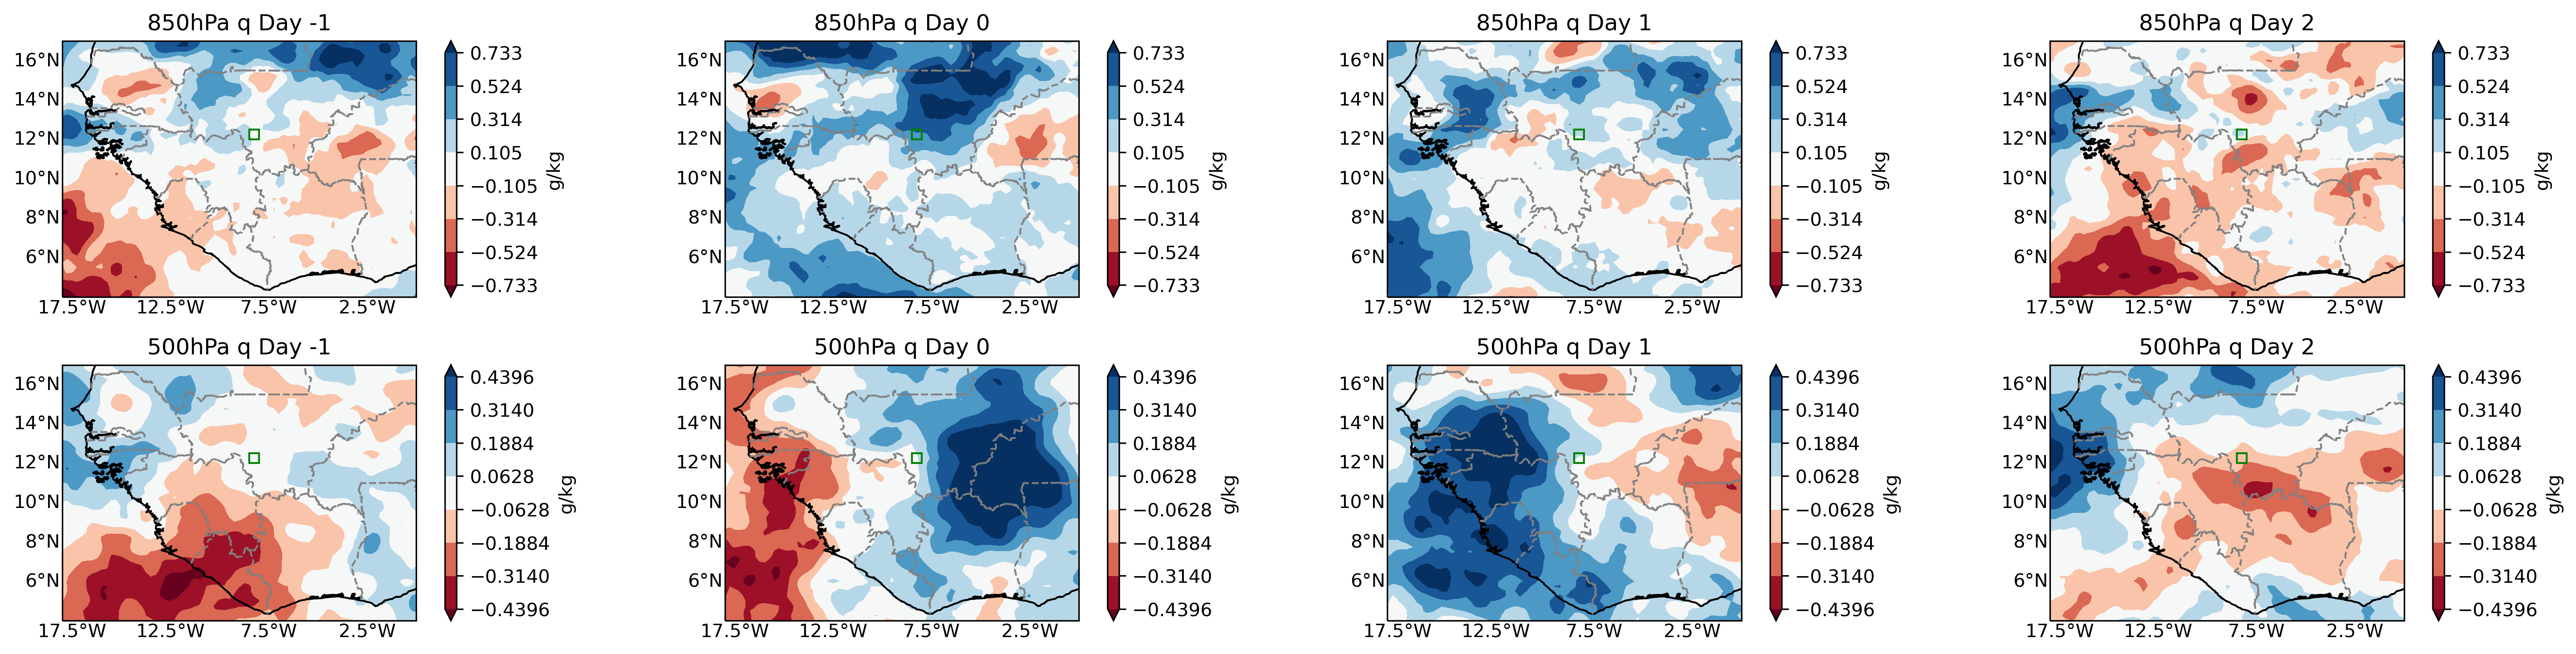

In [166]:
st=2
sarrow = 2
scale = 30
utag = 'u100'
vtag = 'v100'

f = plt.figure(figsize=(20,5), dpi=300)

for ids, num in enumerate([-1, 0,1,2]):

    ax = f.add_subplot(2,4,ids+1, projection=ccrs.PlateCarree())
    print(num)
    dic, lat, lon = run(num)
    dic = calc(dic)
    
    if ids == 0:
        lon2d, lat2d = np.meshgrid(lon,lat)
        xquiv = lon2d[sarrow::st, sarrow::st]
        yquiv = lat2d[sarrow::st, sarrow::st]
    #ipdb.set_trace()
    
    ws, wd = u_met.u_v_to_ws_wd(dic['u_orig']-dic['u100_orig'], dic['v_orig']-dic['v100_orig'])
    vart = 'q'
    var = dic[vart]*1000
    
    if ids == 0:
        edge = np.max([np.abs(np.percentile(var,1)),np.abs(np.percentile(var,99))])
        lev = np.linspace(edge*-1,edge,8) # edge*-1
    #ipdb.set_trace()
    u = dic[utag]
    v = dic[vtag]

    uu = u[sarrow::st, sarrow::st]
    vv = v[sarrow::st, sarrow::st]
    qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}
    
    
    if vart == 'q':
        vtags = '850hPa q'
    if vart == 'qup':
        vtags = '500hPa q'
    
    cvar = 'cape'
    invar = dic[cvar]
    if ids == 0:
        edge = np.max([np.abs(np.percentile(invar,5)),np.abs(np.percentile(invar,95))])
        levs = np.linspace(edge*-1,edge,4) # edge*-1
    contour = {'data' : invar, 'x' : lon, 'y' : lat, 'levels' : levs}
    
    draw_map(ax, var, lat, lon, title=vtags+' Day '+str(num),  quiver=qin, levels=lev, contour=contour)  #levels=lev,
    
    
for ids, num in enumerate([-1, 0,1,2]):
    

    ax = f.add_subplot(2,4,ids+1+4, projection=ccrs.PlateCarree())
    print(num)
    dic, lat, lon = run(num)
    dic = calc(dic)
    
    if ids == 0:
        lon2d, lat2d = np.meshgrid(lon,lat)
        xquiv = lon2d[sarrow::st, sarrow::st]
        yquiv = lat2d[sarrow::st, sarrow::st]
    #ipdb.set_trace()
    
    ws, wd = u_met.u_v_to_ws_wd(dic['u_orig']-dic['u100_orig'], dic['v_orig']-dic['v100_orig'])
    vart = 'qup'
    var = dic[vart]*1000
    
    if ids == 0:
        edge = np.max([np.abs(np.percentile(var,1)),np.abs(np.percentile(var,99))])
        lev = np.linspace(edge*-1,edge,8) # edge*-1
    #ipdb.set_trace()
    u = dic[utag]
    v = dic[vtag]

    uu = u[sarrow::st, sarrow::st]
    vv = v[sarrow::st, sarrow::st]
    qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}
    
    
    cvar = 'cape'
    invar = dic[cvar]
    if ids == 0:
        edge = np.max([np.abs(np.percentile(invar,5)),np.abs(np.percentile(invar,95))])
        levs = np.linspace(edge*-1,edge,4) # edge*-1
    contour = {'data' : invar, 'x' : lon, 'y' : lat, 'levels' : levs}
    
    if vart == 'q':
        vtags = '850hPa q'
    if vart == 'qup':
        vtags = '500hPa q'
    
    draw_map(ax, var, lat, lon, title=vtags+' Day '+str(num),  quiver=qin, levels=lev, contour=contour)  #levels=lev,

f.canvas.draw()
plt.tight_layout()
plt.savefig(cnst.network_data + 'figs/NFLICS/plots/cb_same/NFLICS_ERA5anomaly_dakarstorms_anom_qtest.jpg')

In [ ]:
#np.sum((tab.lon>-5) & (tab.lon<-4) & (tab.lat>12) & (tab.lat<15))

In [ ]:
#(tab.lon>-5.5) & (tab.lon<-5) & (tab.lat>12) & (tab.lat<12.5)